# Objetivo

## Reduzir churn

A empresa de telecomunicações contratou a A3Data para avaliar o cenário de
churn elevado dos seus clientes e, uma vez que estamos falando de um produto
com custo elevado de setup (instalação), a empresa gostaria de uma estratégia
para reduzir esse churn.

# Visualização inicial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
churn = pd.read_csv("data/customer_churn.csv")

In [3]:
churn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),"118,75","8672,45",No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,"118,65","8477,6",No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,"118,6","7990,05",No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,"118,6","7365,7",No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),"118,35","7804,15",Yes


In [4]:
churn.dtypes

customerID          object
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object

## Pequenas correções nos dados

In [5]:
churn["MonthlyCharges"] = churn["MonthlyCharges"].str.replace(",", ".").astype(float)
churn["TotalCharges"] = (
    churn["TotalCharges"].str.replace(",", ".").replace("", pd.NA).astype(float)
)

Tornando variáveis numéricas em variáveis numéricas no pandas.

In [6]:
churn.shape

(7043, 21)

In [7]:
(
    churn.isna()
    .sum()
    .to_frame("missing_count")
    .assign(pct=lambda d: (d["missing_count"] / len(churn)).round(3))
    .sort_values("missing_count", ascending=False)
)

,missing_count,pct
TotalCharges,11,0.002
gender,0,0.000
SeniorCitizen,0,0.000
Partner,0,0.000
customerID,0,0.000
Dependents,0,0.000
tenure,0,0.000
MultipleLines,0,0.000
PhoneService,0,0.000
OnlineSecurity,0,0.000


In [8]:
churn[churn["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2531,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
3343,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
4023,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
4315,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
4583,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5484,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
5549,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
6213,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
6429,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
6562,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No


In [9]:
churn["tenure"].mean()

np.float64(32.37114865824223)

In [10]:
churn[churn["TotalCharges"].isna()]["tenure"].mean()

np.float64(0.0)

In [11]:
churn[churn["tenure"] == 0][["TotalCharges", "tenure"]]

,TotalCharges,tenure
2531,NaN,0
3343,NaN,0
4023,NaN,0
4315,NaN,0
4583,NaN,0
5484,NaN,0
5549,NaN,0
6213,NaN,0
6429,NaN,0
6562,NaN,0


In [12]:
churn.loc[churn["TotalCharges"].isna(), "TotalCharges"] = 0

Como verificamos que onde o Tenure é igual a zero, TotalCharges é nan, então imputamos o valor de TotalCharges como 0, já que é um cliente novo dado que o tenure é zero.

In [13]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
churn["customerID"].value_counts()
# customer id é único, não tem duplicados

customerID
7569-NMZYQ    1
8984-HPEMB    1
5989-AXPUC    1
5734-EJKXG    1
8199-ZLLSA    1
             ..
0621-CXBKL    1
9945-PSVIP    1
0827-ITJPH    1
9764-REAFF    1
6823-SIDFQ    1
Name: count, Length: 7043, dtype: int64

# Análise Descritiva

## Churn Rate por variáveis categóricas

In [15]:
def churn_rate(series):
    return round((series == "Yes").mean() * 100, 2)

In [16]:
cat_cols = [
    "Contract",
    "InternetService",
    "PaymentMethod",
    "OnlineSecurity",
    "TechSupport",
]

In [17]:
for col in cat_cols:
    print(f"**Churn Rate para {col}:**")
    df_rate = churn.groupby(col)["Churn"].apply(churn_rate).reset_index()
    category_biggest_churn = list(
        df_rate.loc[df_rate["Churn"] == df_rate["Churn"].max()][col]
    )[0]
    display(df_rate)
    print(f"Categoria com maior churn rate: {category_biggest_churn}")
    print("\n")

**Churn Rate para Contract:**


,Contract,Churn
0,Month-to-month,42.71
1,One year,11.27
2,Two year,2.83


Categoria com maior churn rate: Month-to-month


**Churn Rate para InternetService:**


,InternetService,Churn
0,DSL,18.96
1,Fiber optic,41.89
2,No,7.40


Categoria com maior churn rate: Fiber optic


**Churn Rate para PaymentMethod:**


,PaymentMethod,Churn
0,Bank transfer (automatic),16.71
1,Credit card (automatic),15.24
2,Electronic check,45.29
3,Mailed check,19.11


Categoria com maior churn rate: Electronic check


**Churn Rate para OnlineSecurity:**


,OnlineSecurity,Churn
0,No,41.77
1,No internet service,7.40
2,Yes,14.61


Categoria com maior churn rate: No


**Churn Rate para TechSupport:**


,TechSupport,Churn
0,No,41.64
1,No internet service,7.40
2,Yes,15.17


Categoria com maior churn rate: No




### Gráfico de Barras

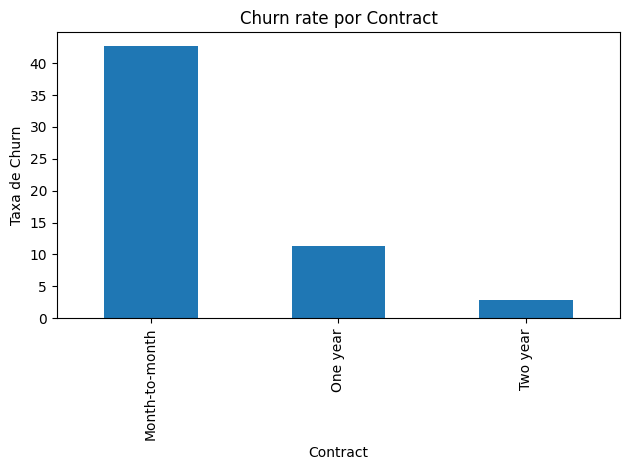

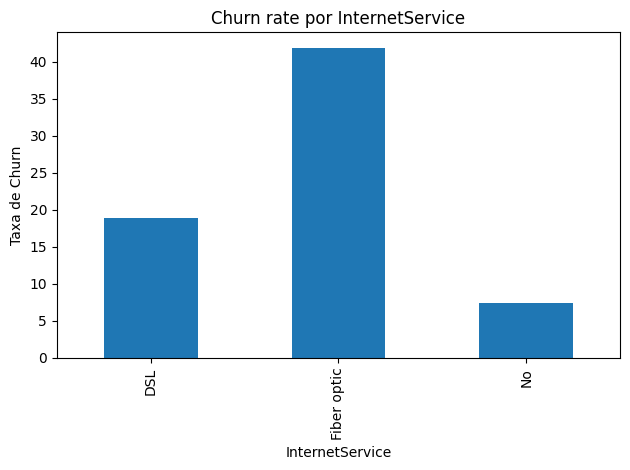

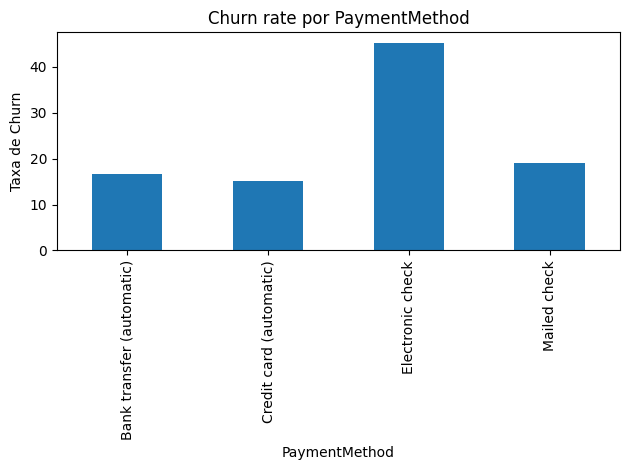

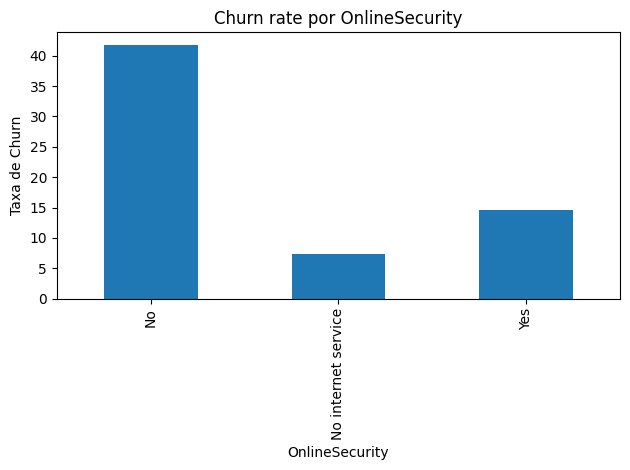

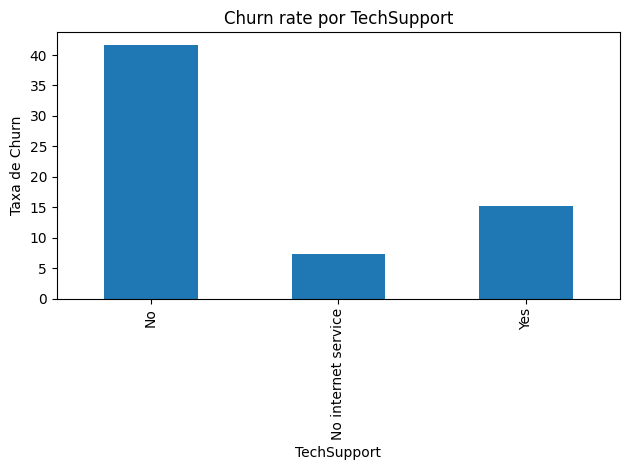

In [18]:
for col in cat_cols:
    plt.figure()
    churn.groupby(col)["Churn"].apply(churn_rate).plot(kind="bar")
    plt.ylabel("Taxa de Churn")
    plt.title(f"Churn rate por {col}")
    plt.tight_layout()
    plt.show()

### Boxplots

In [19]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

<Figure size 640x480 with 0 Axes>

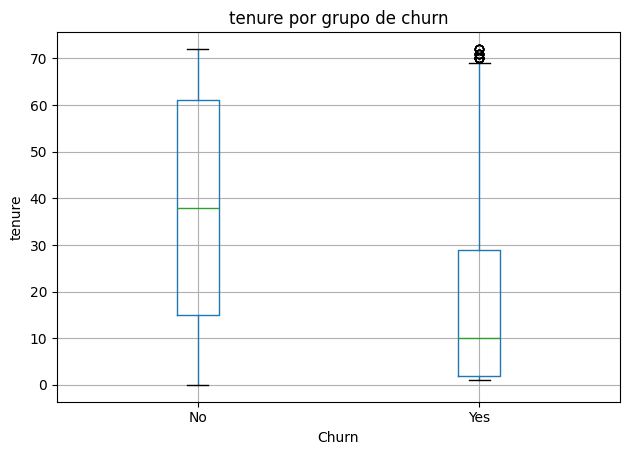

<Figure size 640x480 with 0 Axes>

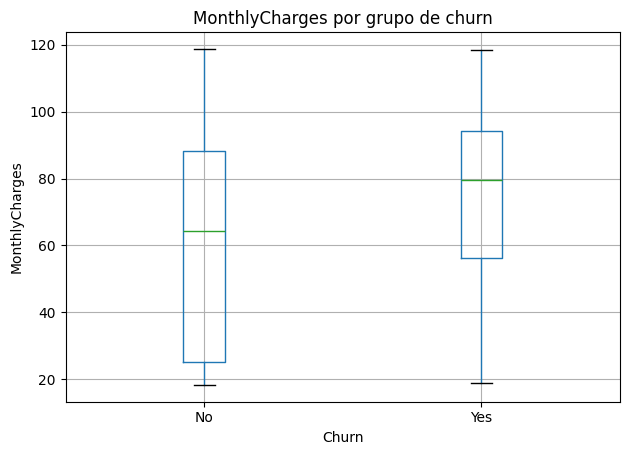

<Figure size 640x480 with 0 Axes>

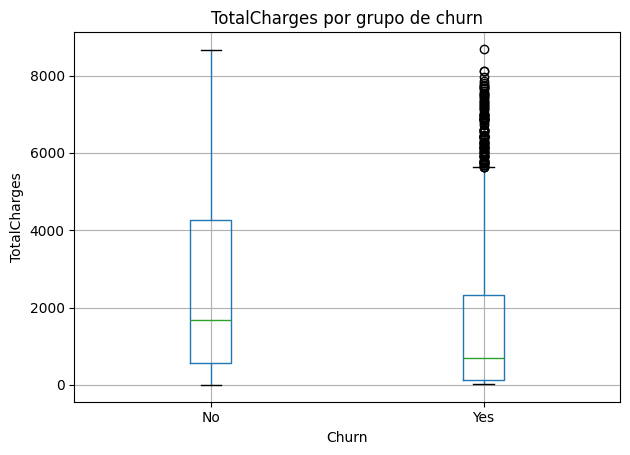

In [20]:
for col in num_cols:
    plt.figure()
    churn.boxplot(column=col, by="Churn")
    plt.title(f"{col} por grupo de churn")
    plt.suptitle("")
    plt.ylabel(f"{col}")
    plt.tight_layout()
    plt.show()

Conseguimos visualizar relação de algumas variáveis mais expressivas com o Churn como Tenure, MonthlyCharges, tipo do contrato e serviços ao cliente (OnlineSecurity e TechSupport), então vamos dar um deep dive. E buscar melhorar o entendimento.


# Deep Dive

In [21]:
churn[["Churn"]].value_counts(normalize=True)

Churn
No       0.73463
Yes      0.26537
Name: proportion, dtype: float64

A empresa tem 26,5% de churn.

## Tenure

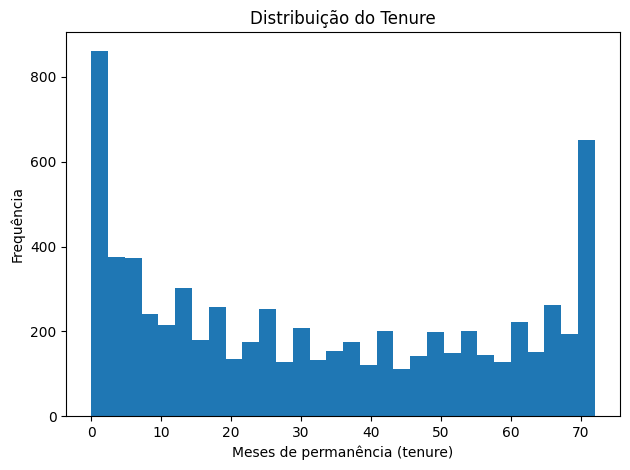

In [22]:
plt.figure()
churn["tenure"].plot(kind="hist", bins=30)
plt.xlabel("Meses de permanência (tenure)")
plt.ylabel("Frequência")
plt.title("Distribuição do Tenure")
plt.tight_layout()
plt.show()

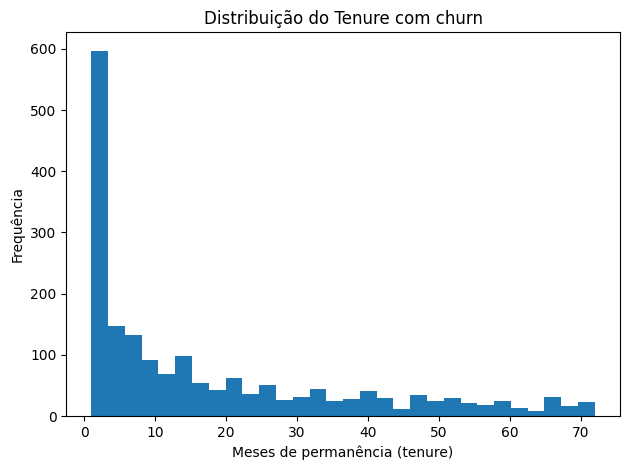

In [23]:
plt.figure()
churn[churn["Churn"] == "Yes"]["tenure"].plot(kind="hist", bins=30)
plt.xlabel("Meses de permanência (tenure)")
plt.ylabel("Frequência")
plt.title("Distribuição do Tenure com churn")
plt.tight_layout()
plt.show()

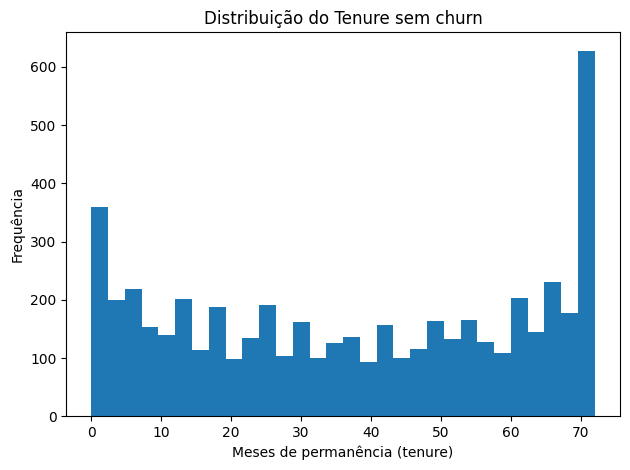

In [24]:
plt.figure()
churn[churn["Churn"] == "No"]["tenure"].plot(kind="hist", bins=30)
plt.xlabel("Meses de permanência (tenure)")
plt.ylabel("Frequência")
plt.title("Distribuição do Tenure sem churn")
plt.tight_layout()
plt.show()

In [25]:
tenure_bins = [0, 6, 12, 24, 48, 60, churn["tenure"].max()]
tenure_labels = ["≤6m", "7-12m", "13-24m", "25-48m", "49-60m", "61m+"]
churn["tenure_bucket"] = pd.cut(churn["tenure"], bins=tenure_bins, labels=tenure_labels)

In [26]:
(
    churn.groupby("tenure_bucket", observed=False)["Churn"]
    .apply(churn_rate)
    .reset_index()
    .rename(columns={"Churn": "churn_rate"})
    .sort_values("tenure_bucket")
)

,tenure_bucket,churn_rate
0,≤6m,53.33
1,7-12m,35.89
2,13-24m,28.71
3,25-48m,20.39
4,49-60m,14.42
5,61m+,6.61


Churn decai conforme o cliente fica mais tempo. Churn extremamente elevado nos primeiros 6 meses e alto nos primeiro Ano.

## Montly Charges

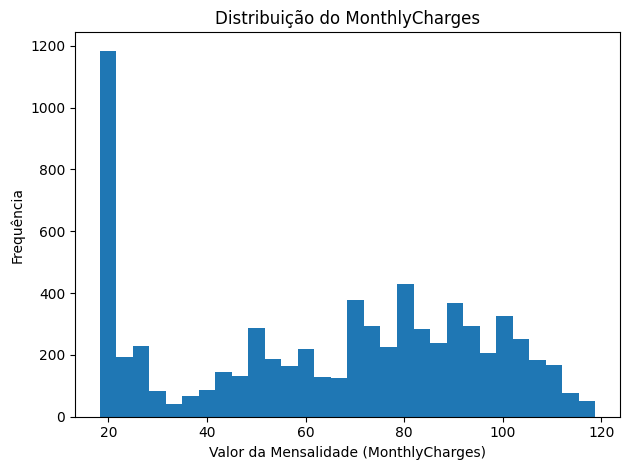

In [27]:
plt.figure()
churn["MonthlyCharges"].plot(kind="hist", bins=30)
plt.xlabel("Valor da Mensalidade (MonthlyCharges)")
plt.ylabel("Frequência")
plt.title("Distribuição do MonthlyCharges")
plt.tight_layout()
plt.show()

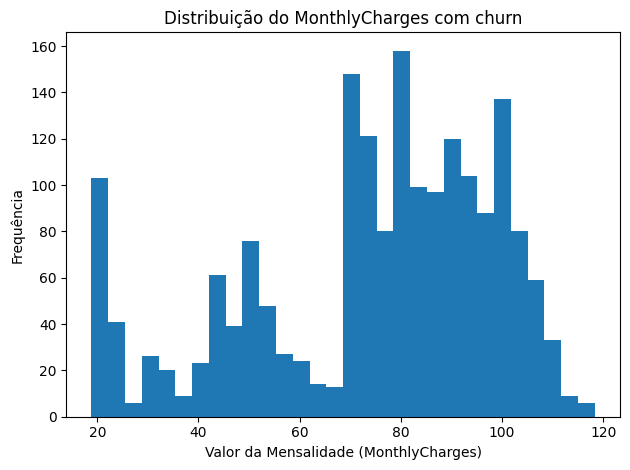

In [28]:
plt.figure()
churn[churn["Churn"] == "Yes"]["MonthlyCharges"].plot(kind="hist", bins=30)
plt.xlabel("Valor da Mensalidade (MonthlyCharges)")
plt.ylabel("Frequência")
plt.title("Distribuição do MonthlyCharges com churn")
plt.tight_layout()
plt.show()

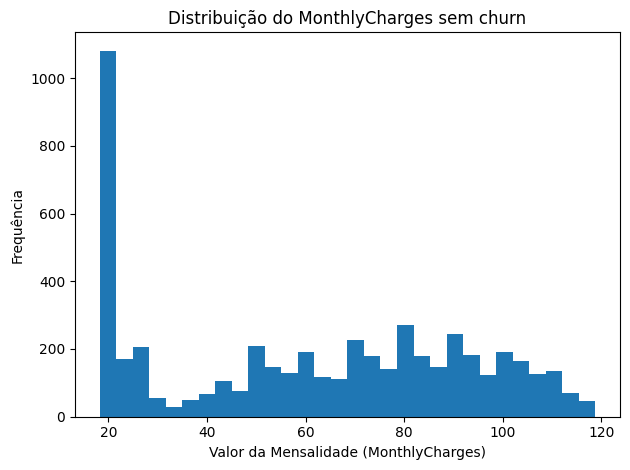

In [29]:
plt.figure()
churn[churn["Churn"] == "No"]["MonthlyCharges"].plot(kind="hist", bins=30)
plt.xlabel("Valor da Mensalidade (MonthlyCharges)")
plt.ylabel("Frequência")
plt.title("Distribuição do MonthlyCharges sem churn")
plt.tight_layout()
plt.show()

In [30]:
churn[churn["Churn"] == "Yes"].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,0.254682,17.979133,74.441332,1531.796094
std,0.435799,19.531123,24.666053,1890.822994
min,0.000000,1.000000,18.850000,18.850000
25%,0.000000,2.000000,56.150000,134.500000
50%,0.000000,10.000000,79.650000,703.550000
75%,1.000000,29.000000,94.200000,2331.300000
max,1.000000,72.000000,118.350000,8684.800000


In [31]:
churn[churn["Churn"] == "No"].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000,5174.000000
mean,0.128721,37.569965,61.265124,2549.911442
std,0.334923,24.113777,31.092648,2329.954215
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,15.000000,25.100000,572.900000
50%,0.000000,38.000000,64.425000,1679.525000
75%,0.000000,61.000000,88.400000,4262.850000
max,1.000000,72.000000,118.750000,8672.450000


Mediana de MonthlyCharges é R$ 80 para churners, R$ 64 para não churners. 

In [32]:
churn["charge_quantile"] = pd.qcut(
    churn["MonthlyCharges"], 4, labels=["Q1", "Q2", "Q3", "Q4"]
)

In [33]:
quartis, limites = pd.qcut(
    churn["MonthlyCharges"], 4, labels=["Q1", "Q2", "Q3", "Q4"], retbins=True
)

In [34]:
(
    churn.groupby("charge_quantile")["Churn"]
    .apply(churn_rate)
    .reset_index()
    .rename(columns={"Churn": "churn_rate"})
)

C:\Users\user\AppData\Local\Temp\ipykernel_26924\1198651867.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (churn.groupby("charge_quantile")["Churn"]


,charge_quantile,churn_rate
0,Q1,11.24
1,Q2,24.58
2,Q3,37.51
3,Q4,32.88


In [35]:
limites

array([ 18.25,  35.5 ,  70.35,  89.85, 118.75])

Há cauda longa; outliers > R$ 70 (Q3) concentram churn alto.

Churn mais elevado nos quantis maiores, ou seja, nos clientes que pagam mais valores mensais.

! Curioso que o Q3 é maior que o Q4.

In [36]:
65 / 66.4

0.9789156626506024

In [37]:
(
    churn.groupby("Contract")["MonthlyCharges"]
    .mean()
    .reset_index()
    .rename(columns={"MonthlyCharges": "mean_monthly_charge"})
)

,Contract,mean_monthly_charge
0,Month-to-month,66.398490
1,One year,65.048608
2,Two year,60.770413


Pouca diferença no valor de month-to-month para one year.

## Total Charges

In [38]:
p90 = churn["TotalCharges"].quantile(0.90)
churn["high_value_customer"] = (churn["TotalCharges"] > p90).astype(int)

In [39]:
(churn.groupby("high_value_customer")["Churn"].apply(churn_rate).reset_index())

,high_value_customer,Churn
0,0,28.10
1,1,12.48


Clientes de alto valor tem churn bem mais baixo.

## Serviços Adicionais

In [40]:
addon_cols = [
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
]

In [41]:
churn["addon_count"] = churn[addon_cols].apply(lambda row: sum(row == "Yes"), axis=1)

In [42]:
(
    churn.groupby("addon_count")["Churn"]
    .apply(churn_rate)
    .reset_index()
    .rename(columns={"Churn": "churn_rate"})
)

,addon_count,churn_rate
0,0,21.41
1,1,45.76
2,2,35.82
3,3,27.37
4,4,22.30
5,5,12.43
6,6,5.28


Churn baixa consideravelmente quando o cliente possui mais serviços adicionais.

In [43]:
for col in addon_cols:
    print(f"**Churn Rate para {col}:**")
    df_rate = churn.groupby(col)["Churn"].apply(churn_rate).reset_index()
    category_biggest_churn = list(
        df_rate.loc[df_rate["Churn"] == df_rate["Churn"].max()][col]
    )[0]
    display(df_rate)
    print(f"Categoria com maior churn rate: {category_biggest_churn}")
    print("\n")

**Churn Rate para OnlineSecurity:**


,OnlineSecurity,Churn
0,No,41.77
1,No internet service,7.40
2,Yes,14.61


Categoria com maior churn rate: No


**Churn Rate para OnlineBackup:**


,OnlineBackup,Churn
0,No,39.93
1,No internet service,7.40
2,Yes,21.53


Categoria com maior churn rate: No


**Churn Rate para DeviceProtection:**


,DeviceProtection,Churn
0,No,39.13
1,No internet service,7.40
2,Yes,22.50


Categoria com maior churn rate: No


**Churn Rate para TechSupport:**


,TechSupport,Churn
0,No,41.64
1,No internet service,7.40
2,Yes,15.17


Categoria com maior churn rate: No


**Churn Rate para StreamingTV:**


,StreamingTV,Churn
0,No,33.52
1,No internet service,7.40
2,Yes,30.07


Categoria com maior churn rate: No


**Churn Rate para StreamingMovies:**


,StreamingMovies,Churn
0,No,33.68
1,No internet service,7.40
2,Yes,29.94


Categoria com maior churn rate: No




Mais de 40% de Churn quando não tem TechSupport e OnlineSecutity. Quase 40% com OnlineBackup e DeviceProtection.

## Correlação

In [44]:
def cramers_v(conf_matrix: pd.DataFrame) -> float:
    """Calcula Cramér's V para uma matriz de contingência."""
    chi2 = (
        (
            (conf_matrix - conf_matrix.mean(axis=1).values[:, None]) ** 2
            / conf_matrix.mean(axis=1).values[:, None]
        )
        .sum()
        .sum()
    )
    n = conf_matrix.values.sum()
    r, k = conf_matrix.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))

In [45]:
num_cols = num_cols + ["addon_count"]

In [46]:
churn["ChurnFlag"] = churn["Churn"].map({"No": 0, "Yes": 1})

In [47]:
(
    churn[num_cols]
    .apply(lambda col: col.corr(churn["ChurnFlag"]))
    .sort_values(key=abs, ascending=False)
)

tenure           -0.352229
TotalCharges     -0.198324
MonthlyCharges    0.193356
addon_count      -0.087698
dtype: float64

Ou seja, correlação negativa com serviços adicionais, tenure e totalCharges, indicando novamente que conforme o cliente é fidelizado e possui mais serviços, menor tendência de sair. Ao contrário da correlação positiva com valor pago da fatura mensal.

In [48]:
new_cat_cols = [
    c
    for c in churn.columns
    if churn[c].dtype == "object"
    and c not in ["customerID", "Churn", "tenure_bucket", "charge_quantile"]
]

In [49]:
cramers_list = []
for col in new_cat_cols:
    table = pd.crosstab(churn[col], churn["Churn"])
    v = cramers_v(table)
    cramers_list.append((col, v))

In [50]:
(
    pd.DataFrame(cramers_list, columns=["variable", "cramers_v"])
    .sort_values("cramers_v", ascending=False)
    .reset_index(drop=True)
)

,variable,cramers_v
0,Contract,0.592759
1,OnlineSecurity,0.560639
2,TechSupport,0.558482
3,InternetService,0.548895
4,PaymentMethod,0.540340
5,OnlineBackup,0.535572
6,DeviceProtection,0.531068
7,StreamingMovies,0.511662
8,StreamingTV,0.511504
9,PaperlessBilling,0.498898


## Partner e Dependent

In [51]:
(
    churn.groupby("Partner")["Churn"]
    .apply(churn_rate)
    .reset_index()
    .rename(columns={"Churn": "churn_rate"})
)

,Partner,churn_rate
0,No,32.96
1,Yes,19.66


In [52]:
(
    churn.groupby("Partner")["MonthlyCharges"]
    .mean()
    .reset_index()
    .rename(columns={"MonthlyCharges": "mean_monthly_charge"})
)

,Partner,mean_monthly_charge
0,No,61.945001
1,Yes,67.776264


In [53]:
(
    churn.groupby("Dependents")["Churn"]
    .apply(churn_rate)
    .reset_index()
    .rename(columns={"Churn": "churn_rate"})
)

,Dependents,churn_rate
0,No,31.28
1,Yes,15.45


In [54]:
(
    churn.groupby("Dependents")["MonthlyCharges"]
    .mean()
    .reset_index()
    .rename(columns={"MonthlyCharges": "mean_monthly_charge"})
)

,Dependents,mean_monthly_charge
0,No,67.002808
1,Yes,59.522156


Novamente Contract, OnlineSecurity e TechSupport se mostrando como variáveis relevantes para a explicação do Churn.

Além disso destacamos Month-To-Month no tipo de contrato e Electronic Desk no Método de pagamento com churn altos.

# Exportando novo dataframe

In [55]:
churn.to_csv("data/customer_churn_verified.csv", index=False)